To measure PP1 intensities 

In [8]:
# import necessary modules
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import skimage.filters as filters
import skimage.color as color
from PIL import Image
import pandas as pd
from skimage.util import img_as_float
from skimage.color import label2rgb, rgb2gray,gray2rgb
from skimage import segmentation,morphology,feature,measure,filters
from scipy import ndimage as ndi
import glob
from natsort import natsorted 
import os
import glob
import re

In [25]:
# import function file
%run functions-Cytoplasm-Method1.ipynb

In [26]:
# path to the local folder for the notebooks
# change path to your folders accordingly
BASE_DIR="/Users/Trupti/01-LIDo/02-VijiProject/ImageAnalysis/" 
#path to the image folder.
IMAGE_DIR=BASE_DIR + "data/XMovie/set2-pp1/"
CSV_DIR = BASE_DIR + "AnalysisMethods/AnalysisResults/XMovie/set2-pp1/csvs/"


#### A List for the Images Folders

In [27]:
dmso=[]
cdki=[]
dmso_path = IMAGE_DIR + 'dmso'
cdki_path=IMAGE_DIR + 'cdki'

for folder in glob.glob(dmso_path + '/*'):
    dmso.append(dmso_path + '/' + folder.split('/')[-1].split('.')[0])
for folder in glob.glob(cdki_path + '/*'):
    cdki.append(cdki_path + '/' + folder.split('/')[-1].split('.')[0])     


In [39]:
# For DMSO

for i in range(len(dmso)):
    
    df_nuf2,df_astrin,nuf2_cyto,astrin_cyto,nuf2_bg,astrin_bg=method1(dmso[i])
    
    df=pd.merge(df_nuf2, df_astrin,  how='outer',on=['label']
                                                       ,suffixes=('_nuf2', '_astrin'))
    df['Nuf2_cyto']=nuf2_cyto
    df['PP1_cyto']=astrin_cyto
    df['Nuf2_bg']=nuf2_bg
    df['PP1_bg']=astrin_bg
    
    directory=dmso[i].split('/')[-1].split('.')[0] # to create a folder per experiment to save csvs
    path = CSV_DIR + 'dmso/' + directory
    try:
        os.makedirs(path)
    except FileExistsError:
    # directory already exists
        pass
    check_nan_in_df = df.isnull().values.any()
    print("There are %d NaN values in %s " %(check_nan_in_df , directory))
    
  
    df.to_csv(path + '/' + 'particles'+'.csv') 
   

There are 0 NaN values in Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG132_DMSO_well3_point6_11min01_R3D_D3D 
There are 0 NaN values in Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG132_DMSO_well3_point3_2min01_R3D_D3D 
There are 0 NaN values in Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG132_DMSO_well3_point4_15min01_R3D_D3D 
There are 0 NaN values in Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG132_DMSO_well3_point5_13min01_R3D_D3D 
There are 0 NaN values in Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG132_DMSO_well3_point7_10min01_R3D_D3D 
There are 0 NaN values in Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG132_DMSO_well3_point1_18min01_R3D_D3D 


In [40]:
# For CDKi

for i in range(len(cdki)):
    
    df_nuf2,df_astrin,nuf2_cyto,astrin_cyto,nuf2_bg,astrin_bg=method1(cdki[i])
    
    df=pd.merge(df_nuf2, df_astrin,  how='outer',on=['label']
                                                       ,suffixes=('_nuf2', '_astrin'))
    df['Nuf2_cyto']=nuf2_cyto
    df['PP1_cyto']=astrin_cyto
    df['Nuf2_bg']=nuf2_bg
    df['PP1_bg']=astrin_bg
    
    directory=cdki[i].split('/')[-1].split('.')[0] # to create a folder per experiment to save csvs
    path = CSV_DIR + 'cdki/' + directory
    try:
        os.makedirs(path)
    except FileExistsError:
    # directory already exists
        pass
    check_nan_in_df = df.isnull().values.any()
    print("There are %d NaN values in %s " %(check_nan_in_df , directory))
    df.to_csv(path + '/' + 'particles'+'.csv') 
   

There are 0 NaN values in Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG132_RO3306_well2_point8_12min01_R3D_D3D 
There are 0 NaN values in Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG132_RO3306_well2_point7_14min01_R3D_D3D 
There are 0 NaN values in Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG132_RO3306_well2_point6_16min01_R3D_D3D 
There are 0 NaN values in Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG132_RO3306_well2_point10_10min01_R3D_D3D 
There are 0 NaN values in Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG132_RO3306_well2_point9_11min01_R3D_D3D 
There are 0 NaN values in Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG132_RO3306_well2_point4_19min01_R3D_D3D 


### Plots

In [28]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1.5, rc={"lines.linewidth":2.5})

# path to save graphs
GRAPH_DIR=BASE_DIR + "AnalysisMethods-Trial/AnalysisResults/XMovie/set2-pp1/graphs/"


In [29]:
# plot graphs 
# dmso vs cdki
# The paths are for the generated csv files
dmso_csv=[]
cdki_csv=[]
dmso_path = CSV_DIR + 'dmso'
cdki_path=CSV_DIR + 'cdki'

for folder in natsorted(glob.glob(dmso_path + '/*')):
    dmso_csv.append(dmso_path + '/' + folder.split('/')[-1].split('.')[0])
    
for folder in natsorted(glob.glob(cdki_path + '/*')):
    cdki_csv.append(cdki_path + '/' + folder.split('/')[-1].split('.')[0])  
 

['/Users/Trupti/01-LIDo/02-VijiProject/ImageAnalysis/AnalysisMethods-Trial/AnalysisResults/XMovie/set2-pp1/csvs/dmso/Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG132_DMSO_well3_point1_18min01_R3D_D3D',
 '/Users/Trupti/01-LIDo/02-VijiProject/ImageAnalysis/AnalysisMethods-Trial/AnalysisResults/XMovie/set2-pp1/csvs/dmso/Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG132_DMSO_well3_point3_2min01_R3D_D3D',
 '/Users/Trupti/01-LIDo/02-VijiProject/ImageAnalysis/AnalysisMethods-Trial/AnalysisResults/XMovie/set2-pp1/csvs/dmso/Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG132_DMSO_well3_point4_15min01_R3D_D3D',
 '/Users/Trupti/01-LIDo/02-VijiProject/ImageAnalysis/AnalysisMethods-Trial/AnalysisResults/XMovie/set2-pp1/csvs/dmso/Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG132_DMSO_well3_point5_13min01_R3D_D3D',
 '/Users/Trupti/01-LIDo/02-VijiProject/ImageAnalysis/AnalysisMethods-Trial/AnalysisResults/XMovie/set2-pp1/csvs/dmso/Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG132_DMSO_well3_point6_11mi

In [34]:
# read both csvs to a dataframe
cell_count=0
df_graph=pd.DataFrame()
for i in range(len(cdki_csv)):
    df_cdki_bg=pd.read_csv(cdki_csv[i]+'/'+'Particles.csv')
    df_temp_cdki=pd.DataFrame(data=(df_cdki_bg['mean_intensity_astrin']))
    df_temp_cdki['pp1@kt/pp1@cyto']= df_cdki_bg['mean_intensity_astrin']/df_cdki_bg['PP1_cyto']
    df_temp_cdki['nuf2@kt/nuf2@cyto']= df_cdki_bg['mean_intensity_nuf2']/df_cdki_bg['Nuf2_cyto']
    df_temp_cdki['pp1@kt/pp1@cyto:nuf2@kt/nuf2@cyto']= df_temp_cdki['pp1@kt/pp1@cyto'] / df_temp_cdki['nuf2@kt/nuf2@cyto']
    df_temp_cdki['condition']='cdki'
    expt_name=re.sub(r'^.+/([^/]+)$', r'\1', cdki_csv[i])
    df_temp_cdki['Experiment']= expt_name#'cdki_%d'%i
    
    df_dmso_bg=pd.read_csv(dmso_csv[i]+'/'+'Particles.csv')
    df_temp_dmso=pd.DataFrame(data=(df_dmso_bg['mean_intensity_astrin']))
    df_temp_dmso['pp1@kt/pp1@cyto']= df_dmso_bg['mean_intensity_astrin']/df_dmso_bg['PP1_cyto']
    df_temp_dmso['nuf2@kt/nuf2@cyto']= df_dmso_bg['mean_intensity_nuf2']/df_dmso_bg['Nuf2_cyto']
    df_temp_dmso['pp1@kt/pp1@cyto:nuf2@kt/nuf2@cyto']= df_temp_dmso['pp1@kt/pp1@cyto'] / df_temp_dmso['nuf2@kt/nuf2@cyto']
    df_temp_dmso['condition']='dmso'
    expt_name=re.sub(r'^.+/([^/]+)$', r'\1', dmso_csv[i])
    df_temp_dmso['Experiment']= expt_name#'cdki_%d'%i
   
   
    
    df_graph=pd.concat([df_graph,df_temp_cdki,df_temp_dmso],ignore_index=True)
    
    cell_count+=1

df_graph.head()

,mean_intensity_astrin,pp1@kt/pp1@cyto,nuf2@kt/nuf2@cyto,pp1@kt/pp1@cyto:nuf2@kt/nuf2@cyto,condition,Experiment
0,9768.947368,1.629260,1.251251,1.302104,cdki,Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG...
1,10591.928571,1.766516,1.297496,1.361480,cdki,Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG...
2,7425.888889,1.238486,1.469400,0.842851,cdki,Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG...
3,9842.125000,1.641464,1.182899,1.387662,cdki,Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG...
4,10472.416667,1.746584,1.185230,1.473625,cdki,Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG...


In [35]:
# count the number of KTs in CDKi and DMSO
cdki = df_graph[df_graph['condition']=='cdki'].shape[0]
dmso = df_graph[df_graph['condition']=='dmso'].shape[0]

### astrin@kt/astrin@cyto

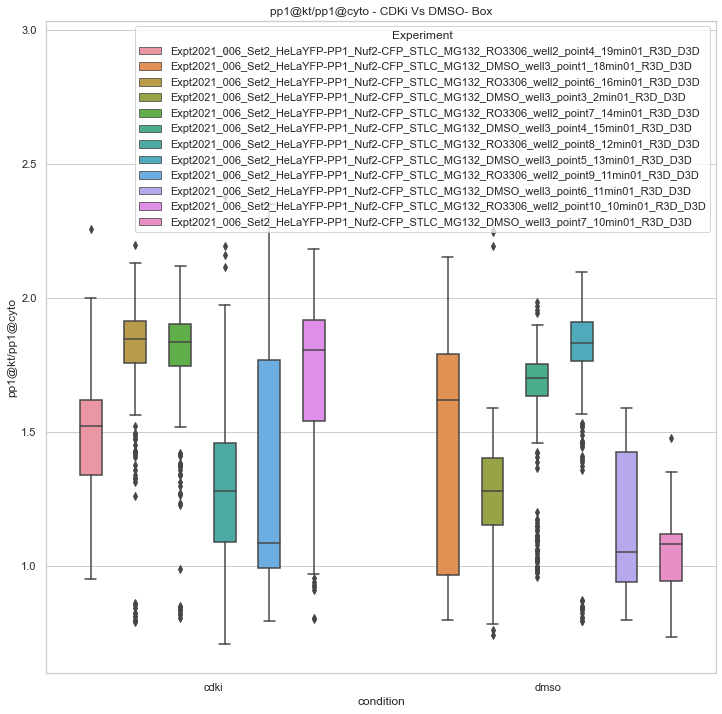

In [37]:
import seaborn as sns
title="pp1@kt/pp1@cyto - CDKi Vs DMSO- Box"
plt.figure(figsize=(12,12))
sns_plot=sns.boxplot(x="condition", y="pp1@kt/pp1@cyto",hue="Experiment",data=df_graph).set_title(title)
#plt.xticks(rotation=90)
#plt.figtext(0.3, 0, 'KTs=%s,cells=%s'%(cdki,4), horizontalalignment='center',verticalalignment='center')
#plt.figtext(0.7, 0, 'KTs=%s,cells=%s'%(dmso,4), horizontalalignment='center',verticalalignment='center')
#sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
plt.show()

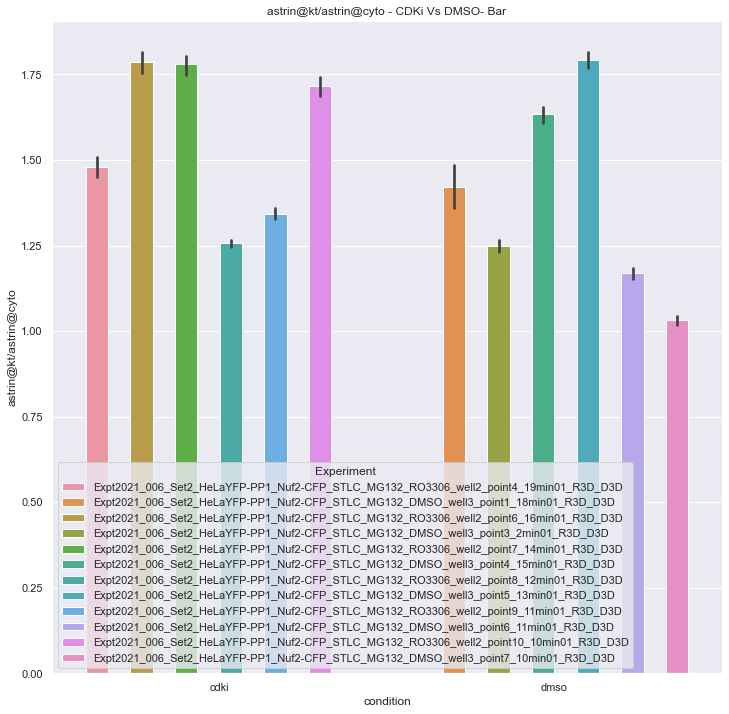

In [14]:
import seaborn as sns
sns.set_theme(style="darkgrid")
title="astrin@kt/astrin@cyto - CDKi Vs DMSO- Bar"
plt.figure(figsize=(12,12))

sns_plot = sns.barplot(
        data=df_graph,
        x="condition",
        y="astrin@kt/astrin@cyto",
        hue="Experiment"
    ).set_title(title)

plt.show()

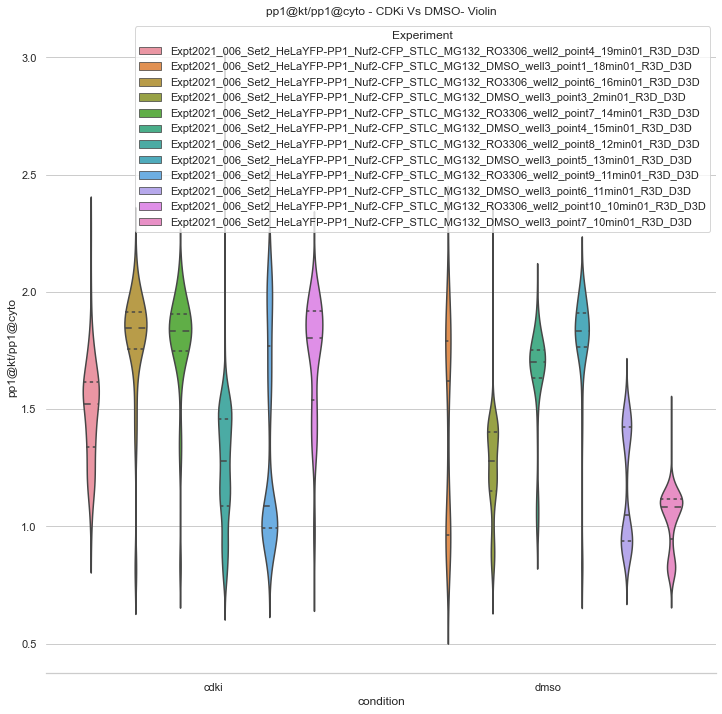

In [38]:
import seaborn as sns
title="pp1@kt/pp1@cyto - CDKi Vs DMSO- Violin"
plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")


# Draw a nested violinplot and split the violins for easier comparison
sns_plot=sns.violinplot(data=df_graph, x="condition", y="pp1@kt/pp1@cyto", hue="Experiment",
              inner="quart",
               ).set_title(title)
#plt.xticks(rotation=90)
#sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
sns.despine(left=True)

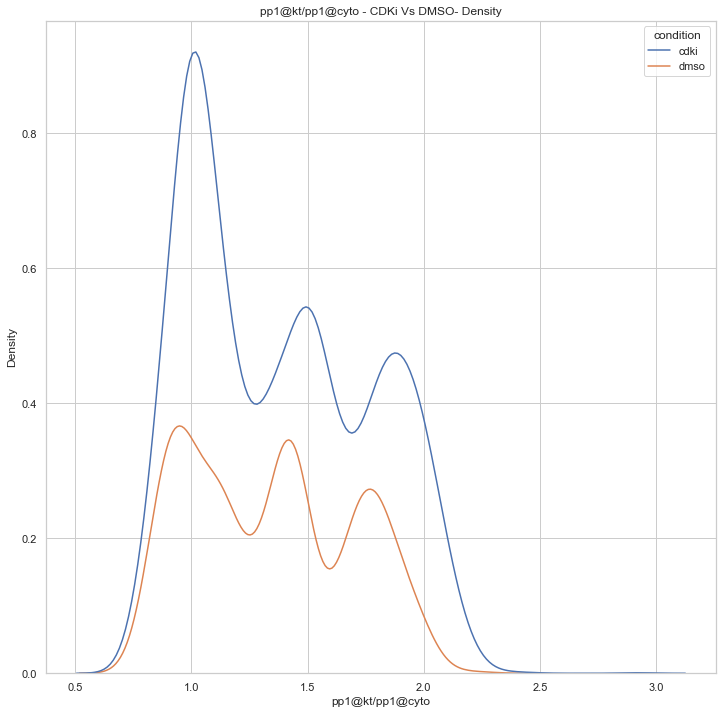

In [39]:

import seaborn as sns
title="pp1@kt/pp1@cyto - CDKi Vs DMSO- Density"
plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")

sns_plot=sns.kdeplot(data=df_graph, x="pp1@kt/pp1@cyto",hue='condition').set_title(title)
#sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)



### astrin@kt/astrin@cyto:nuf2@kt/nuf2@cyto

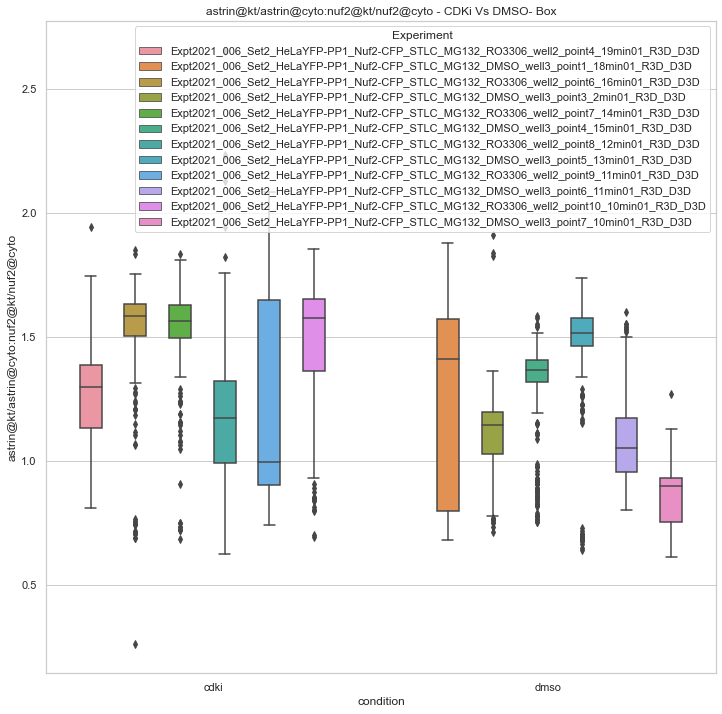

In [17]:
import seaborn as sns
title="astrin@kt/astrin@cyto:nuf2@kt/nuf2@cyto - CDKi Vs DMSO- Box"
plt.figure(figsize=(12,12))
sns_plot=sns.boxplot(x="condition", y="astrin@kt/astrin@cyto:nuf2@kt/nuf2@cyto",hue="Experiment",data=df_graph).set_title(title)
#plt.xticks(rotation=90)
#plt.figtext(0.3, 0, 'KTs=%s,cells=%s'%(cdki,4), horizontalalignment='center',verticalalignment='center')
#plt.figtext(0.7, 0, 'KTs=%s,cells=%s'%(dmso,4), horizontalalignment='center',verticalalignment='center')
#sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
plt.show()

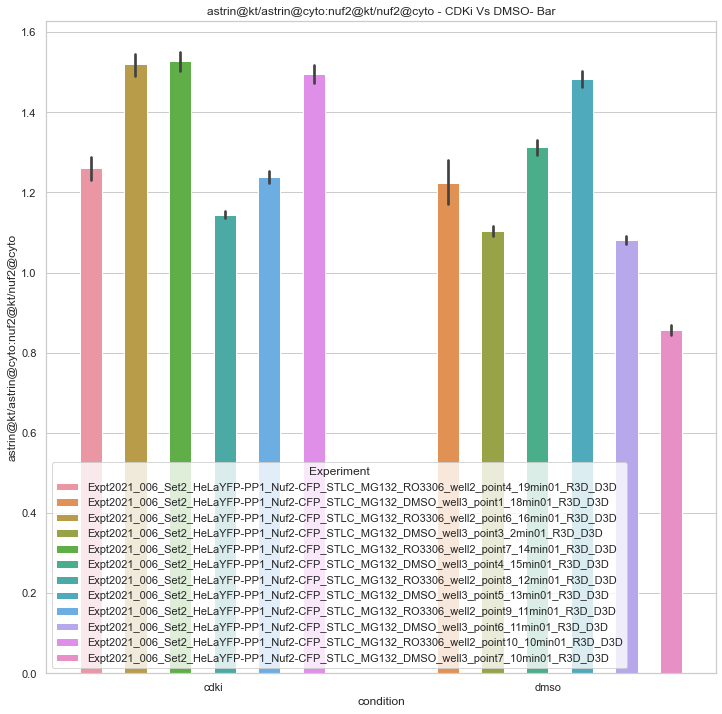

In [18]:
import seaborn as sns
title="astrin@kt/astrin@cyto:nuf2@kt/nuf2@cyto - CDKi Vs DMSO- Bar"
plt.figure(figsize=(12,12))

sns_plot = sns.barplot(
        data=df_graph,
        x="condition",
        y="astrin@kt/astrin@cyto:nuf2@kt/nuf2@cyto",
        hue="Experiment"
    ).set_title(title)
#plt.xticks(rotation=90)
#sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
plt.show()

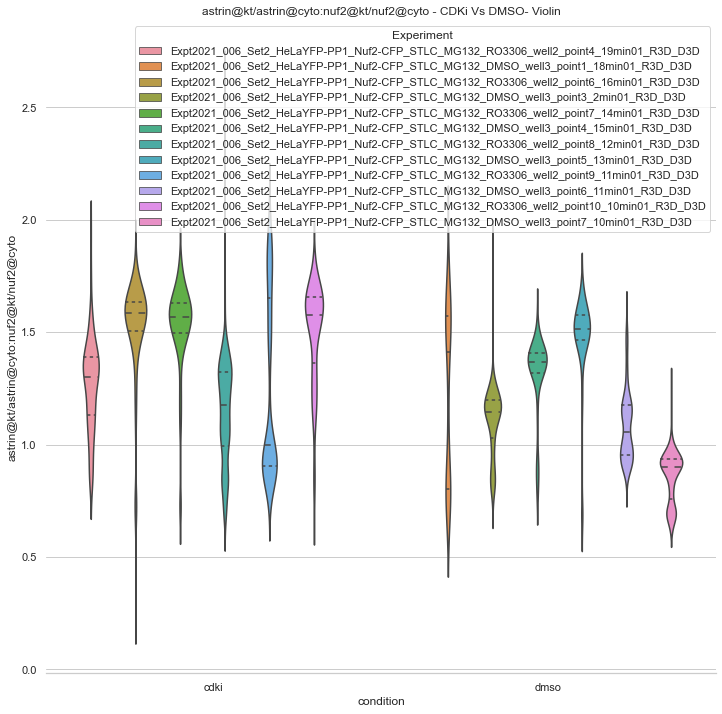

In [19]:

import seaborn as sns
title="astrin@kt/astrin@cyto:nuf2@kt/nuf2@cyto - CDKi Vs DMSO- Violin"
plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")


# Draw a nested violinplot and split the violins for easier comparison
sns_plot=sns.violinplot(data=df_graph, x="condition", y="astrin@kt/astrin@cyto:nuf2@kt/nuf2@cyto", hue="Experiment",
              inner="quart",
               ).set_title(title)
#plt.xticks(rotation=90)
#sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
sns.despine(left=True)

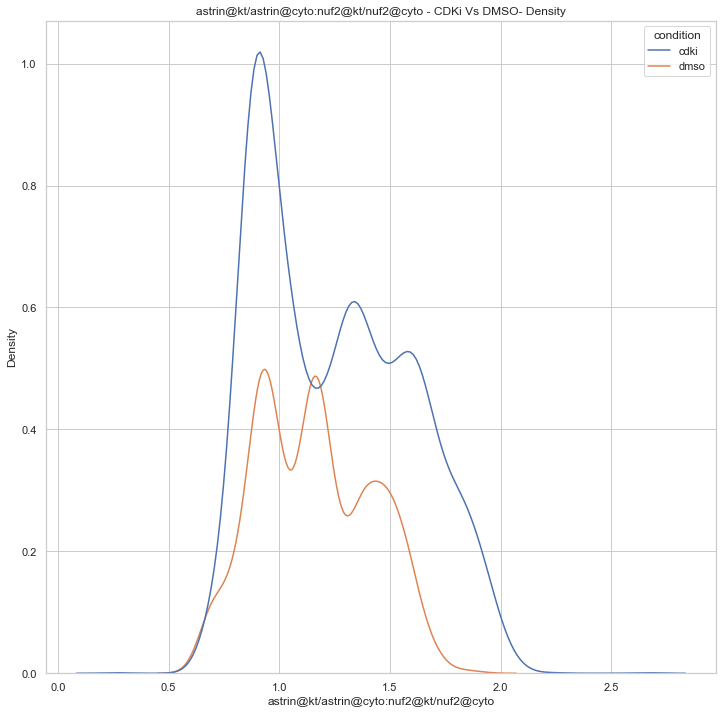

In [21]:

import seaborn as sns
title="astrin@kt/astrin@cyto:nuf2@kt/nuf2@cyto - CDKi Vs DMSO- Density"
plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")

sns_plot=sns.kdeplot(data=df_graph, x="astrin@kt/astrin@cyto:nuf2@kt/nuf2@cyto",hue='condition').set_title(title)
#sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)


### code to check

In [ ]:
#generate a dataframe with inverse
df_inverse= df_graph.copy()
df_inverse['intensity_ratio'] = df_graph['intensity_ratio'].apply(lambda x: 1/ x)

In [ ]:
# pp1 to mask


title="PP1 Vs Mask Intensity Ratio : CDKi Vs DMSO"
plt.figure(figsize=(12,12))
sns_plot=sns.boxplot(x='condition',y='intensity_ratio',color='white',data=df_inverse).set_title(title)
sns_plot = sns.swarmplot(s=1,x='condition',y='intensity_ratio',hue='cell',data=df_inverse)
plt.figtext(0.3, 0, 'KTs=%s,cells=%s'%(cdki,cell_count), horizontalalignment='center',verticalalignment='center')
plt.figtext(0.7, 0, 'KTs=%s,cells=%s'%(dmso,cell_count), horizontalalignment='center',verticalalignment='center')


sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
plt.show()
                                                    



In [ ]:
df1=pd.DataFrame()
for i in range(len(cdki_csv)):
    df_cdki=pd.read_csv(cdki_csv[i]+'/'+'particles.csv')
    df_dmso=pd.read_csv(dmso_csv[i]+'/'+'particles.csv')
    df1=pd.concat([df1,df_cdki,df_dmso],ignore_index=True)
df1['pp1@kt/pp1@cyto']= df1['mean_intensity_astrin']/df1['PP1_cyto']
df1['nuf2@kt/nuf2@cyto']= df1['mean_intensity_nuf2']/df1['Nuf2_cyto']
df1['pp1@kt/pp1@cyto:nuf2@kt/nuf2@cyto']= df1['pp1@kt/pp1@cyto'] / df1['nuf2@kt/nuf2@cyto']
df1.head()